In [3]:
#this sets up a tester Main service class with constant file data instead of taking time to download from all sources

In [1]:
import json
from MainService import MainService
with open('jsondata/allcleandata.json','r') as f:
    data = f.read()
allCleanData = json.loads(data)
with open('jsondata/allcleannames.json','r') as f:
    data = f.read()
allCleanNames = json.loads(data)
m = MainService(allCleanData, allCleanNames)

Correlator initialized.


In [ ]:
#This will search the database for matching series titles

In [34]:
m.queryNames("wheat")

{'Bread whole wheat pan per lb. (453.6 gm) in U.S. city average average price not seasonally adjusted',
 'PPI Commodity data for Farm products-Hard amber durum wheat not seasonally adjusted',
 'PPI Commodity data for Farm products-Hard red spring wheat not seasonally adjusted',
 'PPI Commodity data for Farm products-Hard red winter wheat not seasonally adjusted',
 'PPI Commodity data for Farm products-Soft red winter wheat not seasonally adjusted',
 'PPI Commodity data for Farm products-Wheat not seasonally adjusted',
 'PPI Commodity data for Processed foods and feeds-Bread (white wheat rye etc.) including frozen not seasonally adjusted',
 'PPI Commodity data for Processed foods and feeds-Dark wheat breads (whole wheat cracked wheat multigrain etc.) not seasonally adjusted',
 'PPI Commodity data for Processed foods and feeds-Wheat flour not seasonally adjusted',
 'PPI Commodity data for Processed foods and feeds-Wheat mill products corn mill products and other grain mill products excep

In [54]:
#This shows the highest correlated commodities as well as plots the timeseriesdata

PPI Commodity data for Processed foods and feeds-Wheat flour not seasonally adjusted 0.9993984945921434
PPI industry data for Flour milling-Primary products not seasonally adjusted 0.9308149813030447
PPI industry data for Flour milling not seasonally adjusted 0.8850633011312247
PPI industry data for Flour milling & malt mfg not seasonally adjusted 0.8711415006374563
PPI Commodity data for Farm products-Wheat not seasonally adjusted 0.8318737109575368


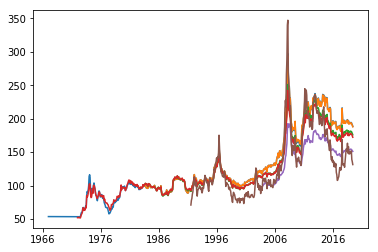

In [35]:
search = 'PPI industry data for Flour milling-Wheat flour (except flour mixes) made in flour mills not seasonally adjusted'
names = []
highest = m.findFiveHighestCorrelated(search)
names.append(m.getIdFromName(search))
for i in highest:
    print(m.getNameFromId(i[0]), i[1])
    names.append(i[0])
z = plotTimeSeries(names)

In [5]:
import matplotlib.pyplot as plt
import datetime
def plotTimeSeries(Ids):
    for Id in Ids:
        x = list(m.TimeSeries[Id].keys())
        newx = []
        for date in x:
            newmonth = int(date[:2])
            newyear = int(date[3:])
            newday = 1
            newdate = datetime.date(year = newyear, month = newmonth, day = newday)
            newx.append(newdate)
        y = list(m.TimeSeries[Id].values())
        plt.plot_date(newx,y, linestyle = 'solid', marker = None)
    plt.show()

    